<a href="https://colab.research.google.com/github/christian-freshness/Predicting-customer-buying-behaviour/blob/main/Predicting_customer_buying_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Models from scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/customer_booking.csv', encoding = 'latin-1')

In [ ]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [ ]:
df['booking_complete'].unique()

array([0, 1])

In [ ]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [ ]:
df['route'].unique()

In [ ]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [ ]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

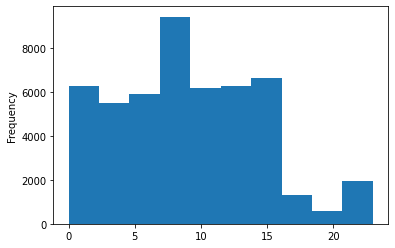

In [ ]:
df.flight_hour.plot.hist();

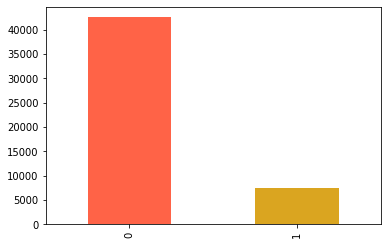

In [ ]:
df['booking_complete'].value_counts().plot(kind='bar', color=['tomato', 'goldenrod']);

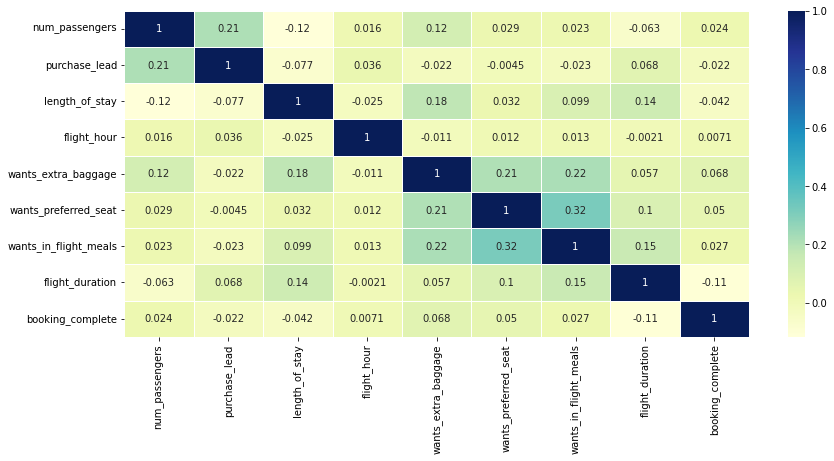

In [ ]:
# making the correlation more visual
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.heatmap(df.corr(),
                 linewidths=0.5,
                 annot=True,
                 cmap='YlGnBu');

In [ ]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [ ]:
categ_col = df.select_dtypes(include=['object', 'category']).columns

num_cols = [col for col in df.columns if col not in categ_col]
print(categ_col)

Index(['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'], dtype='object')


In [ ]:
print(num_cols)

['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']


In [ ]:
# label encoding (explain)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
for i in categ_col:
    df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [ ]:
# splitting the data into X and y
X = df.drop('booking_complete', axis = 1)
y = df['booking_complete']

In [ ]:
# splitting data into train and test set

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape

((40000, 13), (10000, 13))

In [ ]:
# putting models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# setting up a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    fits and evaluates given machine learning models
    models: a dictionary of different scikit learn machine learning models
    X_train: training data (no labels)
    X_test: testing data(no labels)
    y_train: training labels
    y_test: testing labels
    """
    #setting up a random seed
    np.random.seed(42)
    
    # making a dictionary to keep model scores
    model_scores = {}
    
    #looping through models
    for name, model in models.items():
        #fitting the model to the data
        model.fit(X_train, y_train)
        # evaluating the model and appending its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8518, 'KNN': 0.8316, 'Random Forest': 0.8562}

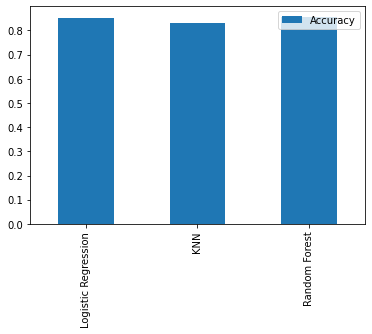

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot.bar();# T means transpose, so as to improve the plot

In [ ]:
# using randomforest 
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model.score(X_test, y_test)

0.8561

In [ ]:
# making predictions with tuned model
y_preds = model.predict(X_test)

In [ ]:
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(confusion_matrix(y_test, y_preds))

[[8407  113]
 [1326  154]]


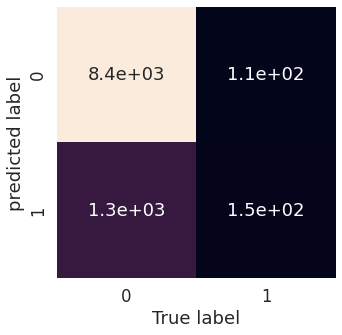

In [ ]:
# plotting the confusion matrix to make it more visual
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    plots a good looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('predicted label')
    
plot_conf_mat(y_test, y_preds)

In [ ]:
# classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.58      0.10      0.18      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000



In [ ]:
# cross_validated accuracy
cv_acc = cross_val_score(model, X, y, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.47558

In [ ]:
# cross_validated precision
cv_precision = cross_val_score(model, X, y, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.20164264803230902

In [ ]:
# cross_validated recall
cv_recall = cross_val_score(model, X, y, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.18077280775490495

In [ ]:
# cross_validated f1-score
cv_f1 = cross_val_score(model, X, y, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.07670274946302151

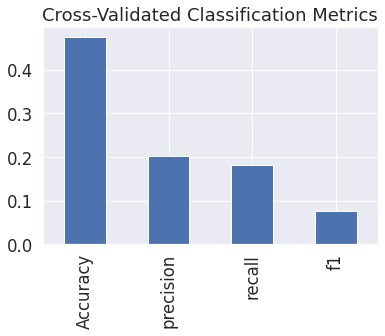

In [ ]:
# visualize the cross_validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'precision': cv_precision,
                           'recall': cv_recall,
                           'f1': cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title='Cross-Validated Classification Metrics',
                      legend=False);

In [ ]:
model.feature_importances_

array([0.04882654, 0.01196948, 0.00170952, 0.19382349, 0.12659057,
       0.14214699, 0.09201752, 0.15120919, 0.10853573, 0.01399536,
       0.01560754, 0.02196891, 0.07159917])

In [ ]:
# creating a function for visualing the feature importances

def plot_importances(columns, importances, n=200):
    df3 = (pd.DataFrame({'features': columns,
                        'feature_importances': importances})
                       .sort_values('feature_importances', ascending=False)
                       .reset_index(drop=False))

    # plotting the dataframe
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.barplot(x = 'feature_importances', y = 'features', data = df3[:n], orient='h')
    plt.ylabel('features')
    plt.xlabel('feature_importances')

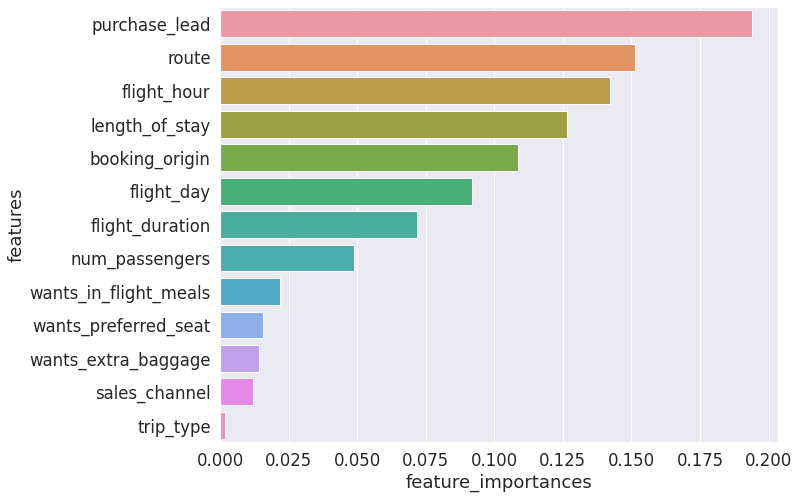

In [ ]:
plot_importances(X_train.columns, model.feature_importances_)

In [ ]:
df5 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds})

df5

,actual values,predictions
33553,0,0
9427,0,0
199,0,0
12447,0,0
39489,0,0
...,...,...
28567,0,0
25079,0,0
18707,0,0
15200,0,0


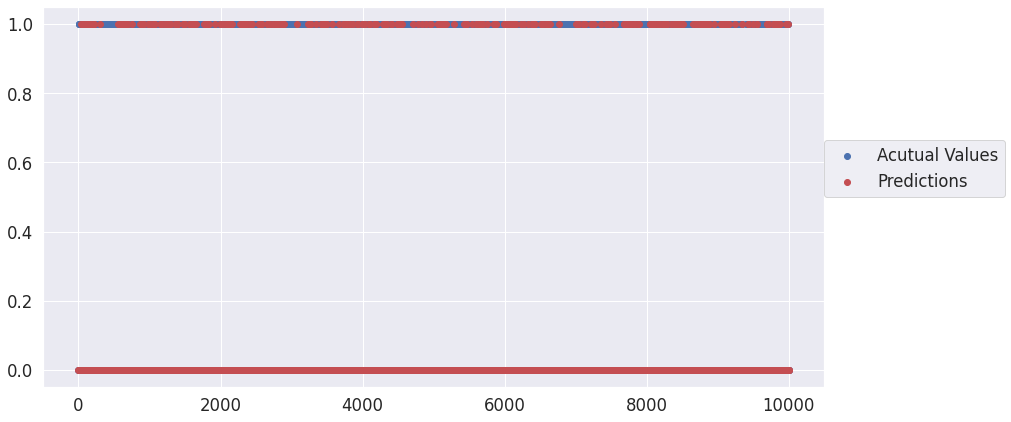

In [ ]:
fig, ax = plt.subplots(figsize = (14,7))
x = np.arange(0, len(df5), 1)
ax.scatter(x, df5["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df5["predictions"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

In [ ]:
y_train.value_counts()

0    34002
1     5998
Name: booking_complete, dtype: int64

# Balancing the data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN

In [ ]:
sampler = RandomUnderSampler()

In [ ]:
# Resample the data
X_resampled, y_resampled = sampler.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

0    7478
1    7478
Name: booking_complete, dtype: int64

In [ ]:
# splitting data into train and test set

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape

((11964, 13), (2992, 13))

In [ ]:
# using randomforest 
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model2.score(X_test, y_test)

0.7192513368983957

In [ ]:
# making predictions with tuned model
y_preds2 = model2.predict(X_test)

In [ ]:
y_preds2

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
print(confusion_matrix(y_test, y_preds2))

[[1072  450]
 [ 390 1080]]


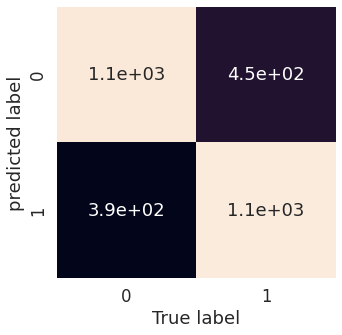

In [ ]:
plot_conf_mat(y_test, y_preds2)

In [ ]:
# classification report
print(classification_report(y_test, y_preds2))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      1522
           1       0.71      0.73      0.72      1470

    accuracy                           0.72      2992
   macro avg       0.72      0.72      0.72      2992
weighted avg       0.72      0.72      0.72      2992



In [ ]:
# cross_validated accuracy
cv_acc = cross_val_score(model2, X_resampled, y_resampled, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.3688820248624662

In [ ]:
# cross_validated precision
cv_precision = cross_val_score(model2, X_resampled, y_resampled, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.10079140890950496

In [ ]:
# cross_validated recall
cv_recall = cross_val_score(model2, X_resampled, y_resampled, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.03530458033015578

In [ ]:
# cross_validated f1-score
cv_f1 = cross_val_score(model2, X_resampled, y_resampled, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.0548398246566648

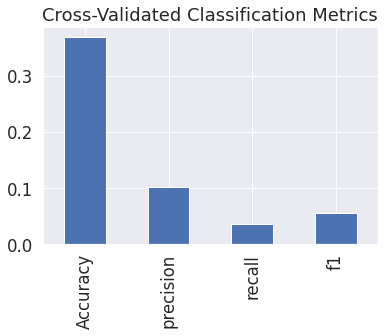

In [ ]:
# visualize the cross_validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'precision': cv_precision,
                           'recall': cv_recall,
                           'f1': cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title='Cross-Validated Classification Metrics',
                      legend=False);

In [ ]:
model2.feature_importances_

array([0.04441277, 0.01388028, 0.00254659, 0.16358109, 0.12459886,
       0.12199058, 0.08050489, 0.15499331, 0.15501164, 0.02159395,
       0.01805756, 0.0212018 , 0.07762667])

In [ ]:
# creating a function for visualing the feature importances

def plot_importances(columns, importances, n=200):
    df4 = (pd.DataFrame({'features': columns,
                        'feature_importances': importances})
                       .sort_values('feature_importances', ascending=False)
                       .reset_index(drop=False))

    # plotting the dataframe
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.barplot(x = 'feature_importances', y = 'features', data = df4[:n], orient='h')
    plt.ylabel('features')
    plt.xlabel('feature_importances')

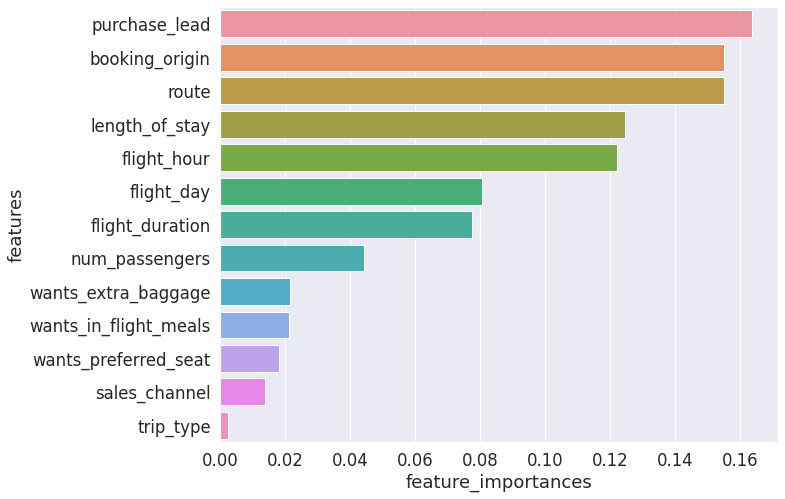

In [ ]:
plot_importances(X_train.columns, model2.feature_importances_)

In [ ]:
df5 = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds2})

df5

,actual values,predictions
3921,0,1
14845,1,1
6669,0,1
10315,1,1
14872,1,1
...,...,...
10302,1,0
367,0,0
4244,0,1
416,0,0


In [ ]:
y_train.value_counts()

1    6008
0    5956
Name: booking_complete, dtype: int64